LOADING MY PACKAGES

In [1]:
from __future__ import print_function, absolute_import

try:
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

np.random.seed(1234)

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Using TensorFlow backend.


**LOADING THE DATA**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train mnist data set shape:',x_train.shape)
print('test mnist data set shape:',x_test.shape)

print('train mnist y labels:',y_train)
print('test mnist y labels:',y_test)

11493376/11490434 [==============================] - 0s 0us/step
train mnist data set shape: (60000, 28, 28)
test mnist data set shape: (10000, 28, 28)
train mnist y labels: [5 0 4 ... 5 6 8]
test mnist y labels: [7 2 1 ... 4 5 6]


**PREPROCESSING THE DATA**

In [3]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print('train mnist data set after reshape:',x_train.shape)
print('test mnist data set after reshape:',x_test.shape)

print('max value:',np.max(x_train))
print('min value:', np.min(x_train))

# converting into float32
x_train = x_train.astype('float32')
x_train = x_train.astype('float32')
# Z-Score nomalization
# defining a function

x_train = x_train/ 255.0
x_test = x_test / 255.0
def z_norm(data):
  data = data - np.mean(data) / data.std()
  return data

x_train = z_norm(x_train)
x_test = z_norm(x_test)

print('max value after nomalization:',np.max(x_train))
print('min value after normalization:', np.min(x_test))

train mnist data set after reshape: (60000, 28, 28, 1)
test mnist data set after reshape: (10000, 28, 28, 1)
max value: 255
min value: 0
max value after nomalization: 0.5759256
min value after normalization: -0.4268052693386959


**DEALING WITH THE LABELS**

In [0]:
def to_categorical(y, classes):
  y = np_utils.to_categorical(y, num_classes=classes)
  return y

y_train = to_categorical(y_train, classes=10)
y_test = to_categorical(y_test, classes=10)

**DEFINING THE MODEL**

In [5]:
model = tf.keras.Sequential([
         tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(240, activation='relu'),
         tf.keras.layers.Dense(10, activation='softmax')           
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 240)               1106160   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2410      
Total params: 1,109,402
Trainable params: 1,109,402
Non-trainable params: 0
______________________________________________

In [0]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

**FITTING THE MODEL AND MODEL TRACKING USING TENSORNOARD**

In [0]:
# loading the tensorboad extension
#%load_ext tensorboard

In [0]:
import datetime

In [0]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [7]:
#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
    x=x_train, y=y_train, verbose=0, epochs=5, batch_size=100, 
    validation_data=(x_test, y_test))
    #callbacks = [tensorboard_callback])

In [0]:
# starting the tensorboad
#%tensorboard --logdir logs/fit

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.1309 - accuracy: 0.9631


[0.13085774355232715, 0.9631]

**UPLOADING MY DATA AND MAKING PREDICTION**

In [20]:
model.predict_classes(np.expand_dims(x_test[20], axis=0))

array([9])

In [0]:
from PIL import  Image
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [85]:
from google.colab import files
image_O = files.upload()

Saving 0.png to 0 (2).png


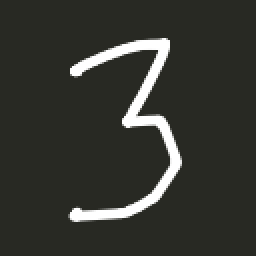

In [86]:
image_O = '/content/0 (2).png'
Image.open(image_O )

In [0]:
def decode_prediction(image_path):
  img = image.load_img(image_path, color_mode='grayscale', target_size=(28,28,1))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  prediction = model.predict_classes(x)
  return prediction

In [87]:
image_path = image_O

decode_prediction(image_path=image_path)

array([3])

In [49]:
img_path = '/content/0.png'
img = image.load_img(img_path, color_mode='grayscale', target_size=(28,28,1))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict_classes(x)
preds

array([0])